<a href="https://colab.research.google.com/github/nathansouz4/Programming_space/blob/main/Processo_seletivo_Poder_Judici%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processo seletivo - Poder Judiciário

Este projeto foi desenvolvido como demanda da segunda etapa do processo seletivo de estágio do poder juduciário, de correspondêcia PIT19457-2022.

Este projeto contem os três itens requeridos pela tarefa, com execeção da implementação da ferramenta API REST.

Este notebook foi desenvolvido pelo estudante Nathan Souza de Oliveira,aluno do curso de engenharia em elétrica pela UFRN, de matrícula 20190088689.

## 1 : Importando o dataset

É importante fazer a importação das bibliotecas abaixos, uma vez que servem como ferramentas primordiais para a visualização do dataset.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Também é muito importante lembrar, antes de executar a célula abaixo, é de suma importância verificar se o caminho para acessar o arquivo **sample.parquet** esteja correto. Neste caso, o arquivo se encontra no meu GoogleDrive, na pasta processo_seletivo_etapa2.


In [11]:
dataset = pd.read_parquet('/content/drive/MyDrive/Processo_seletivo_Etapa_2/sample.parquet', engine='auto')

### Visualizando o dataset

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
dataset.head()

,num_processo,data_ajuizamento,data_primeira_movimentacao_processual,data_ultima_movimentacao,autor,reu,tutela_antecipada,vara,titular_substituto,classe_atual,codigo_assunto_cnj,assunto_cnj,complemento_assunto_cnj,detalhe_assunto_cnj,num_advogados,advogado_1,juizado_itinerante,medida_acautelatoria,justica_gratuita,ministerio_publico,prioridade_processual,rpv,tipo_distribuicao,pedido_urgencia,n_audiencias_conciliacao,n_audiencias_instrucao,n_pericias_realizadas,nome_perito,processo_arquivado,data_arquivamento,n_movimentacoes,tempo_processual,liminar,data_liminar,data_sentenca,magistrado_sentenca,resultado_1_grau,conteudo_sentenca,n_dias_ate_sentenca,n_tokens_sentenca,relator_acordao,data_sessao_tr,data_acordao,conteudo_acordao,resultado_2_grau,n_tokens_acordao
0,0500454-62.2017.4.05.8402,2017-03-06,2017-03-06 11:01:00,2017-10-30 10:07:00,Lourival Francisco da Silva (027.173.384-54)\nMaria das Vitórias Nunes Silva Lourenço (RN008392),Fazenda Nacional (00.394.460/0239-40)\nMunicípio de Lagoa Nova (08.182.313/0001-10)\nUNIÃO (26.9...,N,9-RN,Titular,Execução de Título Judicial,6048,Direito Tributário,Contribuições,Contribuições Previdenciárias,1,RN008392,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,N,0,0,0,SEM PERÍCIA,1,2017-10-26 08:47:00,56,238.0,SEM PEDIDO LIMINAR,NaT,2017-05-21 18:23:56,ARNALDO PEREIRA DE ANDRADE SEGUNDO,PROCEDENTE,SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA...,76.307593,1309,Almiro José da Rocha Lemos,2017-08-09 09:00:00,2017-08-14 10:46:34,PROCESSO 0500454-62.2017.4.05.8402 EMENTA:DIREITO TRIBUTÁRIO. SERVIDOR PÚBLICO. RECURSO INOMINA...,NÃO PROVIMENTO,381.0
1,0517700-16.2013.4.05.8013,2013-10-09,2013-10-09 20:54:00,NaT,MARIA LUCIA CARDOSO (382.242.084-00)\nEmanuel Florêncio Barbosa (AL002019),Caixa Econômica Federal (00.360.305/0001-04),N,9-AL,Titular,Procedimento do Juizado Especial Cível,10433,Direito Civil,Responsabilidade Civil,Indenização por Dano Moral,1,AL002019,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,S,0,0,0,SEM PERÍCIA,<NA>,NaT,<NA>,NaN,SEM PEDIDO LIMINAR,NaT,2013-10-30 17:10:04,ANDRÉ CARVALHO MONTEIRO,EXTINTO SEM MÉRITO,"SENTENÇA Trata-se de ação especial cível, em cuja petição verifico, de plano, a existência de ví...",20.844491,263,NaN,NaT,NaT,None,NaN,0.1
2,0502388-07.2007.4.05.8305,2007-07-13,2007-07-13 13:51:00,NaT,QUITÉRIA BARBOSA DA SILVA NASCIMENTO (062.819.274-60)\nPaulo Emanuel Perazzo Dias (PE020418),Instituto Nacional do Seguro Social - INSS (29.979.036/0193-21),N,23-PE,Titular,Procedimento do Juizado Especial Cível,6138,Direito Previdenciário,"RMI - Renda Mensal Inicial, Reajustes e Revisões Específicas",Reajustes e Revisões Específicos,1,PE020418,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,N,0,0,0,SEM PERÍCIA,<NA>,NaT,<NA>,NaN,SEM PEDIDO LIMINAR,NaT,2007-12-04 09:35:02,ANDRÉ CARVALHO MONTEIRO,EXTINTO SEM MÉRITO,SENTENÇA Vistos etc. Trata-se de ação especial visando a cobrança de diferenças na concessão de ...,143.822245,956,NaN,NaT,NaT,None,NaN,0.1
3,0503551-02.2014.4.05.8103,2014-04-02,2014-04-02 11:02:00,NaT,Emanuela Carneiro Tabosa (777.839.723-49)\nBruno Henrique Vaz Carvalho (CE019341)\nDiego de Frei...,UNIÃO (FAZENDA NACIONAL) - Procuradoria da Fazenda Nacional no Ceará - PFN/CE (00.394.460/0223-82),N,19-CE,Titular,Procedimento do Juizado Especial Cível,6048,Direito Tributário,Contribuições,Contribuições Previdenciárias,2,CE019341,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,S,0,0,0,SEM PERÍCIA,<NA>,NaT,<NA>,NaN,INDEFERIDA,2014-11-16 23:11:00,2014-04-23 19:41:13,ADONIAS RIBEIRO DE CARVALHO NETO,PROCEDENTE,"SENTENÇA I - RELATÓRIO Cuida-se de ação em que a parte autora, Emanuela Carneiro Tabosa postula ...",21.360567,3037,CÍNTIA MENEZES BRUNETTA,2014-06-25 13:30:00,2014-06-27 16:14:43,"VOTO Relatório dispensado, nos termos do art. 38 da Lei n.o 9.099/95. Competência dos Juizados E...",NÃO PROVIMENTO,1214.0
4,0503488-94.2016.4.05.8300,2016-03-21,2016-03-21 11:04:00,2019-02-19 13:16:00,Lúcio Flav

Podemos visualizar primordialmente como se encontram as informações contidas no dataset, que contém tanto dados quantitativos quando qualitativos. No tópico de análise exploratória, iremos destrincar mais os dados.

In [ ]:
# resetando configuracao de display de dados
pd.reset_option('^display.', silent=True)

## 2: Análise Exploratória dos Dados (EDA) 

### Análise Exploratória dos Dados contínuos e discretos

In [ ]:
# Verificar tipos de dados
dataset.dtypes

num_processo                                     object
data_ajuizamento                         datetime64[ns]
data_primeira_movimentacao_processual    datetime64[ns]
data_ultima_movimentacao                 datetime64[ns]
autor                                            object
reu                                              object
tutela_antecipada                              category
vara                                           category
titular_substituto                             category
classe_atual                                   category
codigo_assunto_cnj                                int64
assunto_cnj                                    category
complemento_assunto_cnj                        category
detalhe_assunto_cnj                            category
num_advogados                                      Int8
advogado_1                                     category
juizado_itinerante                             category
medida_acautelatoria                           c

In [ ]:
#selecao das colunas com dados numericos relevantes
df_numerico = dataset.loc[:,['num_advogados','n_audiencias_conciliacao', 'n_audiencias_instrucao', 'n_pericias_realizadas' , 'processo_arquivado', 'n_movimentacoes', 'tempo_processual', 'n_dias_ate_sentenca', 'n_tokens_acordao','n_tokens_sentenca']]

In [ ]:
# criacao de um dataframe com apenas variaveis numericas para analisar possiveis relacoes 
df_numerico.head()

,num_advogados,n_audiencias_conciliacao,n_audiencias_instrucao,n_pericias_realizadas,processo_arquivado,n_movimentacoes,tempo_processual,n_dias_ate_sentenca,n_tokens_acordao,n_tokens_sentenca
0,1,0,0,0,1,56,238.0,76.307593,381.0,1309
1,1,0,0,0,<NA>,<NA>,NaN,20.844491,0.1,263
2,1,0,0,0,<NA>,<NA>,NaN,143.822245,0.1,956
3,2,0,0,0,<NA>,<NA>,NaN,21.360567,1214.0,3037
4,1,0,0,0,1,114,1065.0,784.066493,1962.0,2099


In [ ]:
# verificando quantidade de celulas nulas. 
df_numerico.isna().sum()

num_advogados                  0
n_audiencias_conciliacao       0
n_audiencias_instrucao         0
n_pericias_realizadas          0
processo_arquivado          1638
n_movimentacoes             1638
tempo_processual            1638
n_dias_ate_sentenca            0
n_tokens_acordao               0
n_tokens_sentenca              0
dtype: int64

In [ ]:
# visualizar só as instâncias que tem valores ausentes
df_numerico[df_numerico.isnull().sum(axis = 1) != 0]

,num_advogados,n_audiencias_conciliacao,n_audiencias_instrucao,n_pericias_realizadas,processo_arquivado,n_movimentacoes,tempo_processual,n_dias_ate_sentenca,n_tokens_acordao,n_tokens_sentenca
1,1,0,0,0,<NA>,<NA>,NaN,20.844491,0.1,263
2,1,0,0,0,<NA>,<NA>,NaN,143.822245,0.1,956
3,2,0,0,0,<NA>,<NA>,NaN,21.360567,1214.0,3037
15,1,0,1,1,<NA>,<NA>,NaN,218.476701,0.1,259
16,1,0,0,0,<NA>,<NA>,NaN,35.130324,0.1,549
...,...,...,...,...,...,...,...,...,...,...
4991,2,0,0,1,<NA>,<NA>,NaN,248.910289,0.1,985
4992,1,0,0,0,<NA>,<NA>,NaN,70.285428,0.1,1968
4993,1,0,0,0,<NA>,<NA>,NaN,112.922083,3137.0,1036
4996,0,0,0,0,<NA>,<NA>,NaN,368.928773,707.0,1278


Podemos observar que temos 3 colunas que possuem bastante células vazias, para isso poderiamos substituí-las por os valores das médias das suas respectivas células restantes. 

Porém, para ter uma visualização estatistia rápida sem precisar desse tratamento de dados, podemos chamar a função *.describe()* que ignora as células vazias para realizar os cálculos.

In [ ]:
# vamos substituir o valor ausente das categorias com a média deste atributo em relação às demais do conjunto de dados. 
# Decidimos aplicar em apenas uma coluna para visualizar a variancia da média e, por não alterar muito, podemos ignorar os dados vazios.
df_numerico['tempo_processual'] = df_numerico['tempo_processual'].where(pd.notna(df_numerico['tempo_processual']), df_numerico['tempo_processual'].mean())

In [ ]:
df_numerico.describe()

,num_advogados,n_audiencias_conciliacao,n_audiencias_instrucao,n_pericias_realizadas,processo_arquivado,n_movimentacoes,tempo_processual,n_dias_ate_sentenca,n_tokens_acordao,n_tokens_sentenca
count,5000.000000,5000.000000,5000.000000,5000.000000,3362.000000,3362.000000,3362.000000,5000.000000,5000.000000,5000.000000
mean,1.159200,0.082000,0.150000,0.409800,0.920880,44.306068,247.064456,123.781600,228.853820,989.708400
std,0.579588,0.280164,0.369225,0.550568,0.269965,25.691253,268.830437,130.592511,534.395348,1090.407899
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.065308,0.017812,0.100000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,28.000000,97.515625,47.270289,0.100000,298.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,39.000000,169.750000,91.070312,0.100000,664.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,54.000000,293.000000,159.234786,146.250000,1235.250000
max,8.000000,2.000000,3.000000,3.000000,1.000000,492.000000,3214.000000,1840.410521,6038.000000,13794.000000


> **Análise gráfica dos dados contínuos e discretos relevantes**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31c8bf7490>,
      dtype=object)

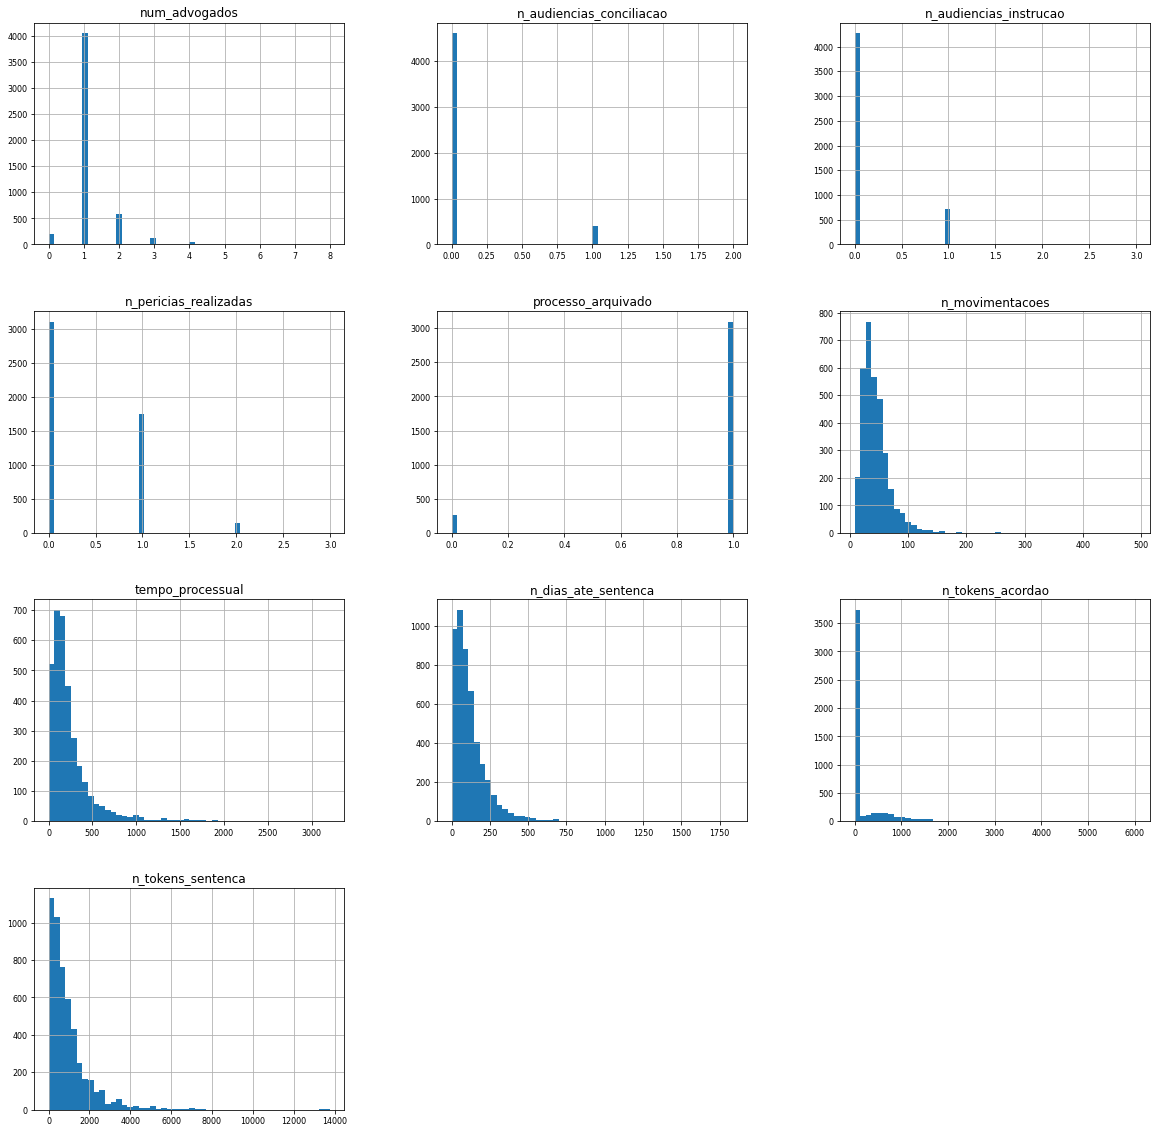

In [ ]:
# podemos utilizar formas mais visuais para ter uma noção do padrão de comportamento dos nossos dados.
df_numerico.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

Dentre nossas variáveis numéricas, podemos visualizar gráficamente a distribuição dos dados para cada variável. 

No eixo x dos gráficos, é possivel visualizar as variáveis qualitativas binárias e no eixo y, temos a quantidade de eventos ocorridos. 

Na maioria dos dos processos o número de advogados é um, mas também existe um número aceitável de processos com dois, três, quatro ou nenhum advogado.

Podemos observar também que a distribuição dos dados referentes a coluna de `n_movimentacoes` se assemelha a uma distribuição normal, o que seria interessante para uma aplicação de aprendizado de máquina.

O `n_tokens_acordao` é majoritariamente nulo, o que não é uma surpresa pois nem sempre existe o acórdão.

Além disso, o número de perícias decresce rapidamente, sendo muito comum serem realizadas uma ou nenhuma.

Em relação ao `n_tokens_sentenca`, podemos concluir que mais de 90% dos processos estão entre 0 e 400 tokens. 

Observando as variáveis de `n_dias_ate_sentenca` e `tempo_processual` , pelos gráficos podemos concluir que mais de 90% dos processos recebem uma sentença entre 0 e 500 dias. Da mesma forma como 90% dos processos levam de 0 a 1000 dias.

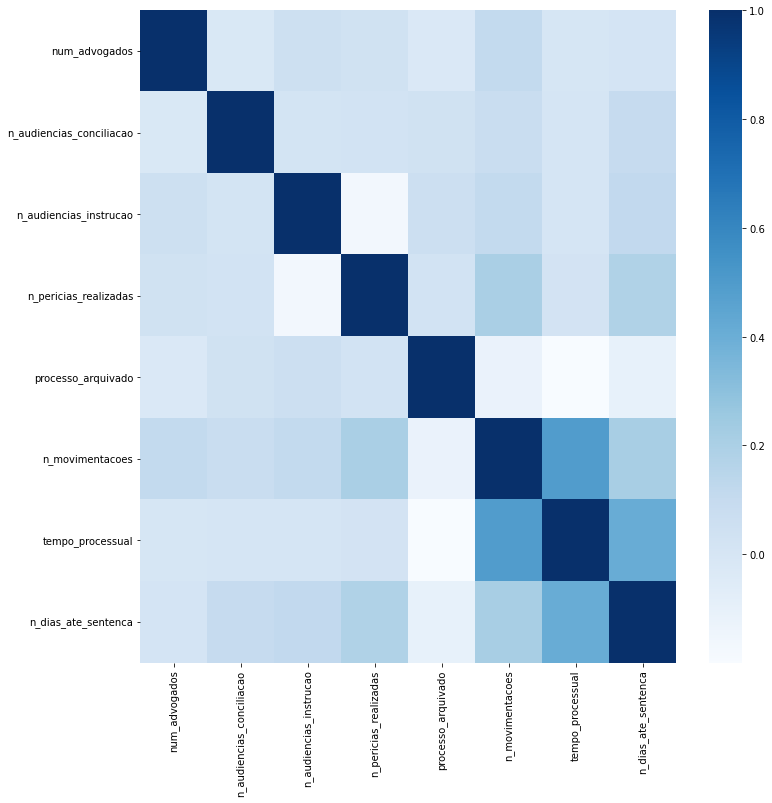

In [ ]:
# visualizar correlação entre as variáveis
plt.figure(figsize=(12, 12))
sns.heatmap(df_numerico.corr(), cmap='Blues');

o mapa de calor, conhecido como heartmap() é construido com base no coeficiente de pearson, que define o grau de correlação entre duas variáveis na estatística. Para efeitos práticos, agora só é necessário entender que quanto mais perto o coeficiente estiver de 1, mais positivamente correlacionadas as variáveis estarão. E quanto mais perto de -1, mais negativamente.

Podemos visualizar que temos uma possível correlação entre as variaveis de tempo processual com o numero de movimentacoes do processo e número de dias até sentença.

### Análise Exploratória de Dados Categoricos e Descritivos

In [ ]:
# Verificar tipos de dados
dataset.dtypes

In [ ]:
#selecao das variaveis categoricas/descritivas relevantes para analise
df_categorico = dataset.loc[:,['autor','reu','tutela_antecipada', 'vara', 'titular_substituto','classe_atual','assunto_cnj','complemento_assunto_cnj','detalhe_assunto_cnj','advogado_1','juizado_itinerante','medida_acautelatoria', 'justica_gratuita', 'ministerio_publico', 'prioridade_processual', 'rpv', 'tipo_distribuicao', 'pedido_urgencia','nome_perito', 'liminar','magistrado_sentenca','resultado_1_grau','conteudo_sentenca','relator_acordao', 'resultado_2_grau', 'conteudo_acordao']]

In [ ]:
df_categorico.head()

,autor,reu,tutela_antecipada,vara,titular_substituto,classe_atual,assunto_cnj,complemento_assunto_cnj,detalhe_assunto_cnj,advogado_1,juizado_itinerante,medida_acautelatoria,justica_gratuita,ministerio_publico,prioridade_processual,rpv,tipo_distribuicao,pedido_urgencia,nome_perito,liminar,magistrado_sentenca,resultado_1_grau,conteudo_sentenca,relator_acordao,resultado_2_grau,conteudo_acordao
0,Lourival Francisco da Silva (027.173.384-54)\nMaria das Vitórias Nunes Silva Lourenço (RN008392),Fazenda Nacional (00.394.460/0239-40)\nMunicípio de Lagoa Nova (08.182.313/0001-10)\nUNIÃO (26.9...,N,9-RN,Titular,Execução de Título Judicial,Direito Tributário,Contribuições,Contribuições Previdenciárias,RN008392,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,N,SEM PERÍCIA,SEM PEDIDO LIMINAR,ARNALDO PEREIRA DE ANDRADE SEGUNDO,PROCEDENTE,SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA...,Almiro José da Rocha Lemos,NÃO PROVIMENTO,PROCESSO 0500454-62.2017.4.05.8402 EMENTA:DIREITO TRIBUTÁRIO. SERVIDOR PÚBLICO. RECURSO INOMINA...
1,MARIA LUCIA CARDOSO (382.242.084-00)\nEmanuel Florêncio Barbosa (AL002019),Caixa Econômica Federal (00.360.305/0001-04),N,9-AL,Titular,Procedimento do Juizado Especial Cível,Direito Civil,Responsabilidade Civil,Indenização por Dano Moral,AL002019,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,S,SEM PERÍCIA,SEM PEDIDO LIMINAR,ANDRÉ CARVALHO MONTEIRO,EXTINTO SEM MÉRITO,"SENTENÇA Trata-se de ação especial cível, em cuja petição verifico, de plano, a existência de ví...",NaN,NaN,None
2,QUITÉRIA BARBOSA DA SILVA NASCIMENTO (062.819.274-60)\nPaulo Emanuel Perazzo Dias (PE020418),Instituto Nacional do Seguro Social - INSS (29.979.036/0193-21),N,23-PE,Titular,Procedimento do Juizado Especial Cível,Direito Previdenciário,"RMI - Renda Mensal Inicial, Reajustes e Revisões Específicas",Reajustes e Revisões Específicos,PE020418,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,N,SEM PERÍCIA,SEM PEDIDO LIMINAR,ANDRÉ CARVALHO MONTEIRO,EXTINTO SEM MÉRITO,SENTENÇA Vistos etc. Trata-se de ação especial visando a cobrança de diferenças na concessão de ...,NaN,NaN,None
3,Emanuela Carneiro Tabosa (777.839.723-49)\nBruno Henrique Vaz Carvalho (CE019341)\nDiego de Frei...,UNIÃO (FAZENDA NACIONAL) - Procuradoria da Fazenda Nacional no Ceará - PFN/CE (00.394.460/0223-82),N,19-CE,Titular,Procedimento do Juizado Especial Cível,Direito Tributário,Contribuições,Contribuições Previdenciárias,CE019341,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,S,SEM PERÍCIA,INDEFERIDA,ADONIAS RIBEIRO DE CARVALHO NETO,PROCEDENTE,"SENTENÇA I - RELATÓRIO Cuida-se de ação em que a parte autora, Emanuela Carneiro Tabosa postula ...",CÍNTIA MENEZES BRUNETTA,NÃO PROVIMENTO,"VOTO Relatório dispensado, nos termos do art. 38 da Lei n.o 9.099/95. Competência dos Juizados E..."
4,Lúcio Flavio de Lima Albuquerque (095.403.004-44)\nPaulianne Alexandre Tenorio (PE020070D)\nPAUL...,ANGELA MARIA DO NASCIMENTO SILVA (157.771.544-68)\nInstituto Nacional do Seguro Social - INSS (2...,N,19-PE,Substituto,Procedimento do Juizado Especial Cível,Direito Previdenciário,Pedidos Genéricos Relativos aos Benefícios em Espécie,Conversão,PE020070D,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,N,SEM PERÍCIA,SEM PEDIDO LIMINAR,GUILHERME SOARES DINIZ,IMPROCEDENTE,"SENTENÇA Tipo A I – RELATÓRIO Dispensado o relatório, na forma do artigo 38 da Lei 9.099/95, sub...",Joaquim Lustosa Filho,NÃO PROVIMENTO,EMENTA PREVIDENCIÁRIO. PENSÃO POR MORTE. PROVA EMPRESTADA. POSSIBILIDADE. REQUISITOS PARA A CONC...


> **Visualizando Variáveis Qualitativas de Carácter Binário( "Sim ou Não" )** 

In [ ]:
# contagem de ocorrencias de resposta binaria
tutela_antecipada = df_categorico['tutela_antecipada'].value_counts().reset_index() 
juizado_itinerante = df_categorico['juizado_itinerante'].value_counts().reset_index() 
medida_acautelatoria = df_categorico['medida_acautelatoria'].value_counts().reset_index() 
justica_gratuita = df_categorico['justica_gratuita'].value_counts().reset_index() 
ministerio_publico = df_categorico['ministerio_publico'].value_counts().reset_index() 
prioridade_processual = df_categorico['prioridade_processual'].value_counts().reset_index() 
pedido_urgencia = df_categorico['pedido_urgencia'].value_counts().reset_index() 

In [ ]:
#criando o dataframe de variaveis qualitativas ordinarias
from functools import reduce
data_frames = [tutela_antecipada,juizado_itinerante,medida_acautelatoria,justica_gratuita,ministerio_publico,prioridade_processual,pedido_urgencia]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames)
df_merged = df_merged.T
df_merged.reset_index(inplace=True) 
df_merged.columns = ['categorias', 'Não' , 'Sim']
df_merged = df_merged.drop(labels=0, axis=0)
df_merged.head()

,categorias,Não,Sim
1,tutela_antecipada,4007,993
2,juizado_itinerante,4969,31
3,medida_acautelatoria,4983,17
4,justica_gratuita,362,4638
5,ministerio_publico,4889,111


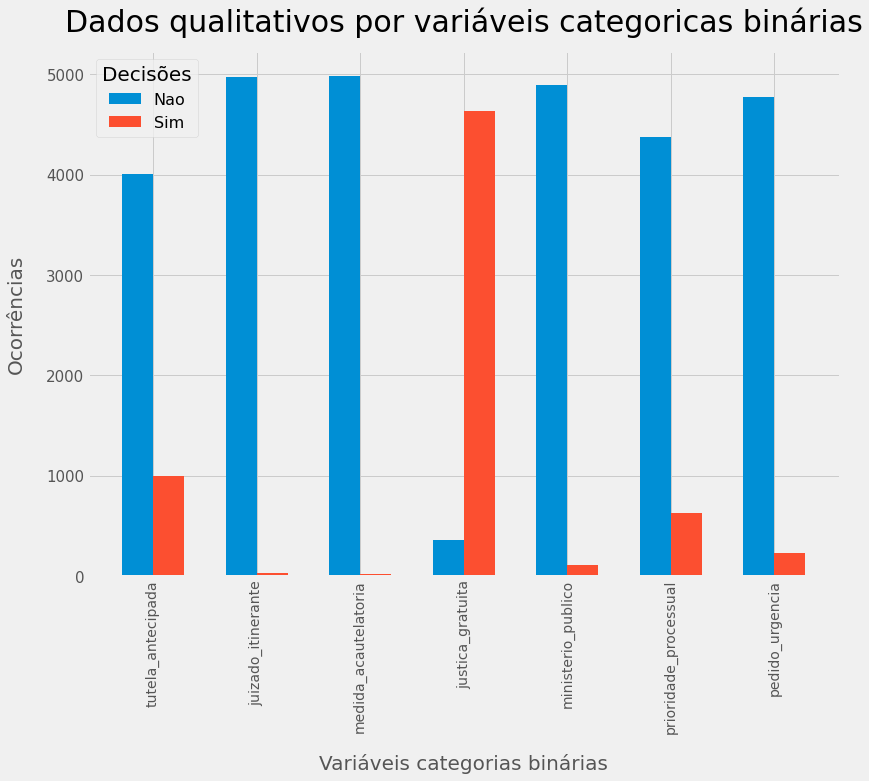

In [ ]:
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")
#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (12,9))
#extract the labels
label = df_merged['categorias']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create out first bar
rect1 = ax.bar(x - width/2,
              df_merged['Não'],
              width = width, 
              label = 'Nao')
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x + width/2,
              df_merged['Sim'],
              width = width,
              label = 'Sim')
#add the labels to the axis
ax.set_ylabel("Ocorrências",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Variáveis categorias binárias",
             fontsize = 20,
             labelpad =20)
ax.set_title("Dados qualitativos por variáveis categoricas binárias",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "Decisões",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

Através do gráfico de barras verticais, podemos visualizar muito bem as variáveis qualitativas binárias.

Visualizado as  variáveis acima, podemos notar que a maioria dos dados binários tem uma forte tendência, na maioria dos casos os dados das variáveis binárias tendem fortemente à uma resposta negativa "Não". 

Observamos um contraste em relação à coluna de justiça gratuita, que a maioria do seu conjunto de dados aponta para uma resposta positiva "Sim".

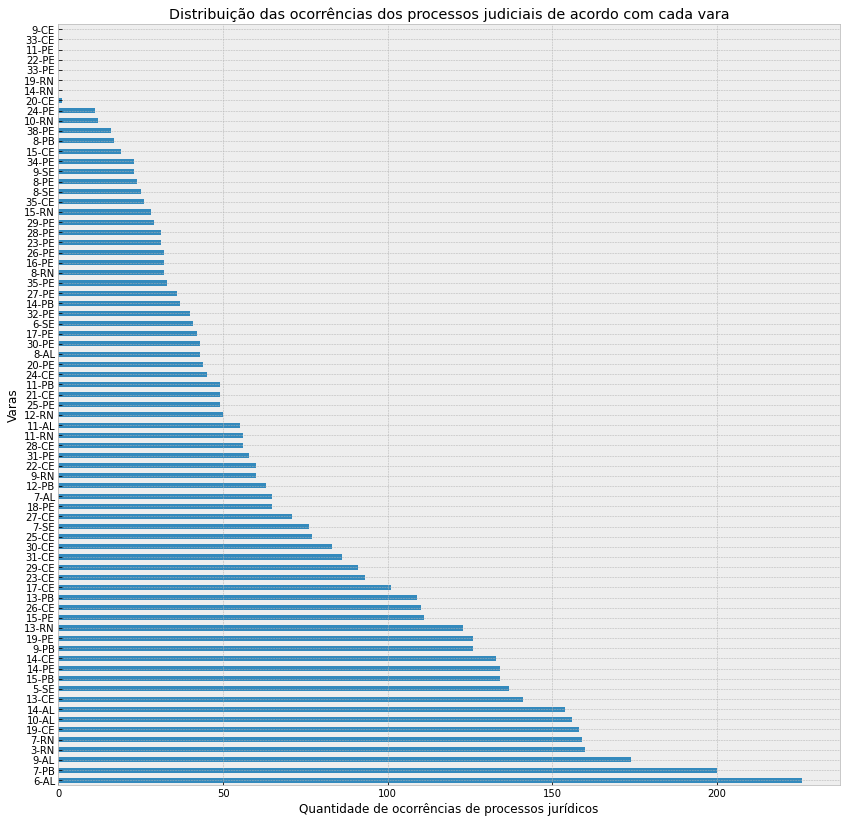

In [ ]:
vara = df_categorico['vara'].value_counts()
plt.style.use('bmh')
plt.figure(figsize = (14, 14))
vara.plot(kind='barh')
plt.xlabel("Quantidade de ocorrências de processos jurídicos")
plt.ylabel("Varas")
plt.title("Distribuição das ocorrências de processos judiciais de acordo com cada vara")
plt.show()

In [ ]:
resultado_1_grau = df_categorico['resultado_1_grau'].value_counts()
resultado_2_grau = df_categorico['resultado_2_grau'].value_counts()

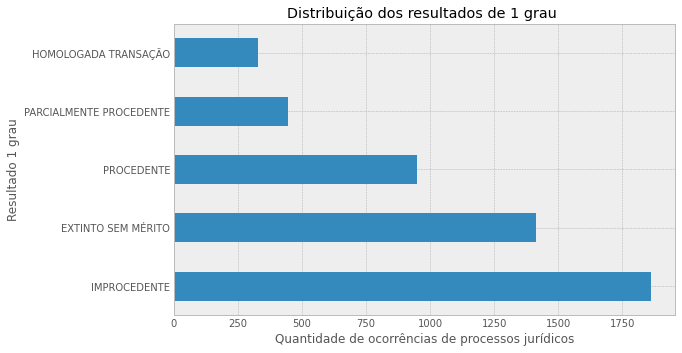

In [ ]:
plt.style.use('bmh')
plt.figure(figsize = (8, 5))
resultado_1_grau.plot(kind='barh')
plt.xlabel("Quantidade de ocorrências de processos jurídicos")
plt.ylabel("Resultado 1 grau")
plt.title("Distribuição dos resultados de 1 grau ")
plt.show()

Ao analisar o gráfico da distribuição dos resultados de 1° grau, podemos concluir que a maioria dos status constam como "IMPROCEDENTE".

Porém, logo em seguida observamos que outros dois status são bem recorrentes nos resultados de 1° grau do nosso bando de dados, são eles: "EXTINTO SEM MÉRITO" e "PROCEDENTE".

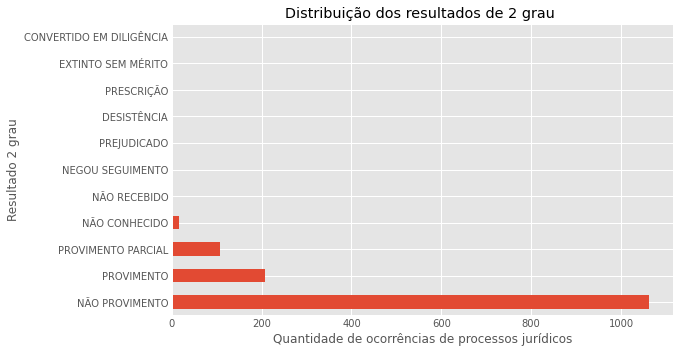

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (8, 5))
resultado_2_grau.plot(kind='barh')
plt.xlabel("Quantidade de ocorrências de processos jurídicos")
plt.ylabel("Resultado 2 grau")
plt.title("Distribuição dos resultados de 2 grau ")
plt.show()

Ao analisar o gráfico da distribuição dos resultados de 2° grau, podemos concluir que a grande maioria dos status constam como "NÃO PROVIMENTO".

In [ ]:
df_categorico.isnull().sum()

autor                         0
reu                           0
tutela_antecipada             0
vara                          0
titular_substituto            0
classe_atual                  0
assunto_cnj                   0
complemento_assunto_cnj      45
detalhe_assunto_cnj          68
advogado_1                    0
juizado_itinerante            0
medida_acautelatoria          0
justica_gratuita              0
ministerio_publico            0
prioridade_processual         0
rpv                           0
tipo_distribuicao             0
pedido_urgencia               0
nome_perito                   0
liminar                       0
magistrado_sentenca           0
resultado_1_grau              0
conteudo_sentenca             0
relator_acordao            3624
resultado_2_grau           3596
conteudo_acordao           3651
dtype: int64

Ao analisar os dados faltantes presentes no nosso dataset de variáveis categoricas, podemos observar que chama bastante atenção o fato de termos cerca de 3600 dados faltantes nas colunas de `relator_acordao`,`resultado_2_grau` e `conteudo_acordao`.

Porém, podemos justificar pelo fato de ser um quesito eventual durante um processo jurídico, não sendo de caráter obrigatório.

In [ ]:
assunto_cnj = df_categorico['assunto_cnj'].value_counts()
complemento_assunto_cnj = df_categorico['complemento_assunto_cnj'].value_counts()
detalhe_assunto_cnj = df_categorico['detalhe_assunto_cnj'].value_counts()

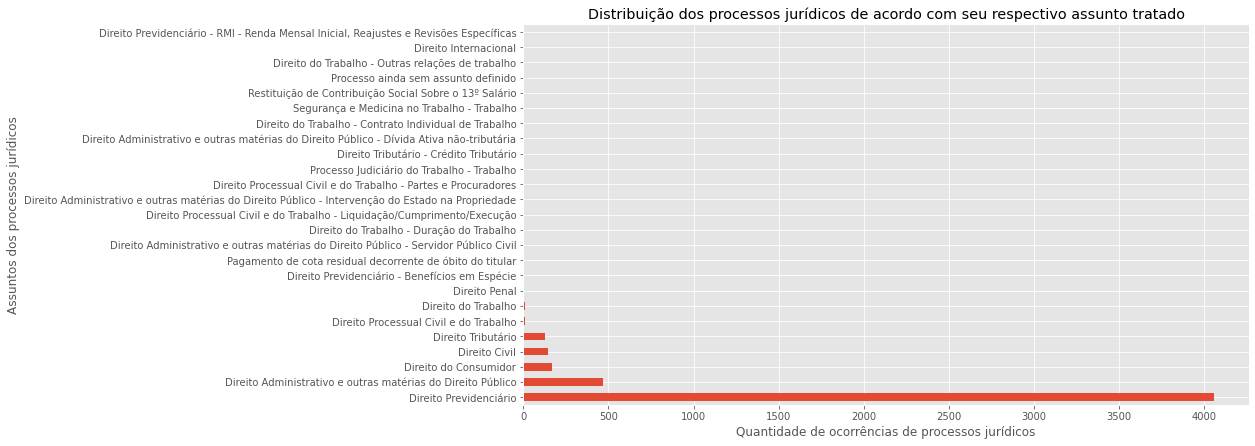

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (13, 7))
assunto_cnj.plot(kind='barh')
plt.xlabel("Quantidade de ocorrências de processos jurídicos")
plt.ylabel("Assuntos dos processos jurídicos")
plt.title("Distribuição dos processos jurídicos de acordo com seus respectivos assuntos")
plt.show()

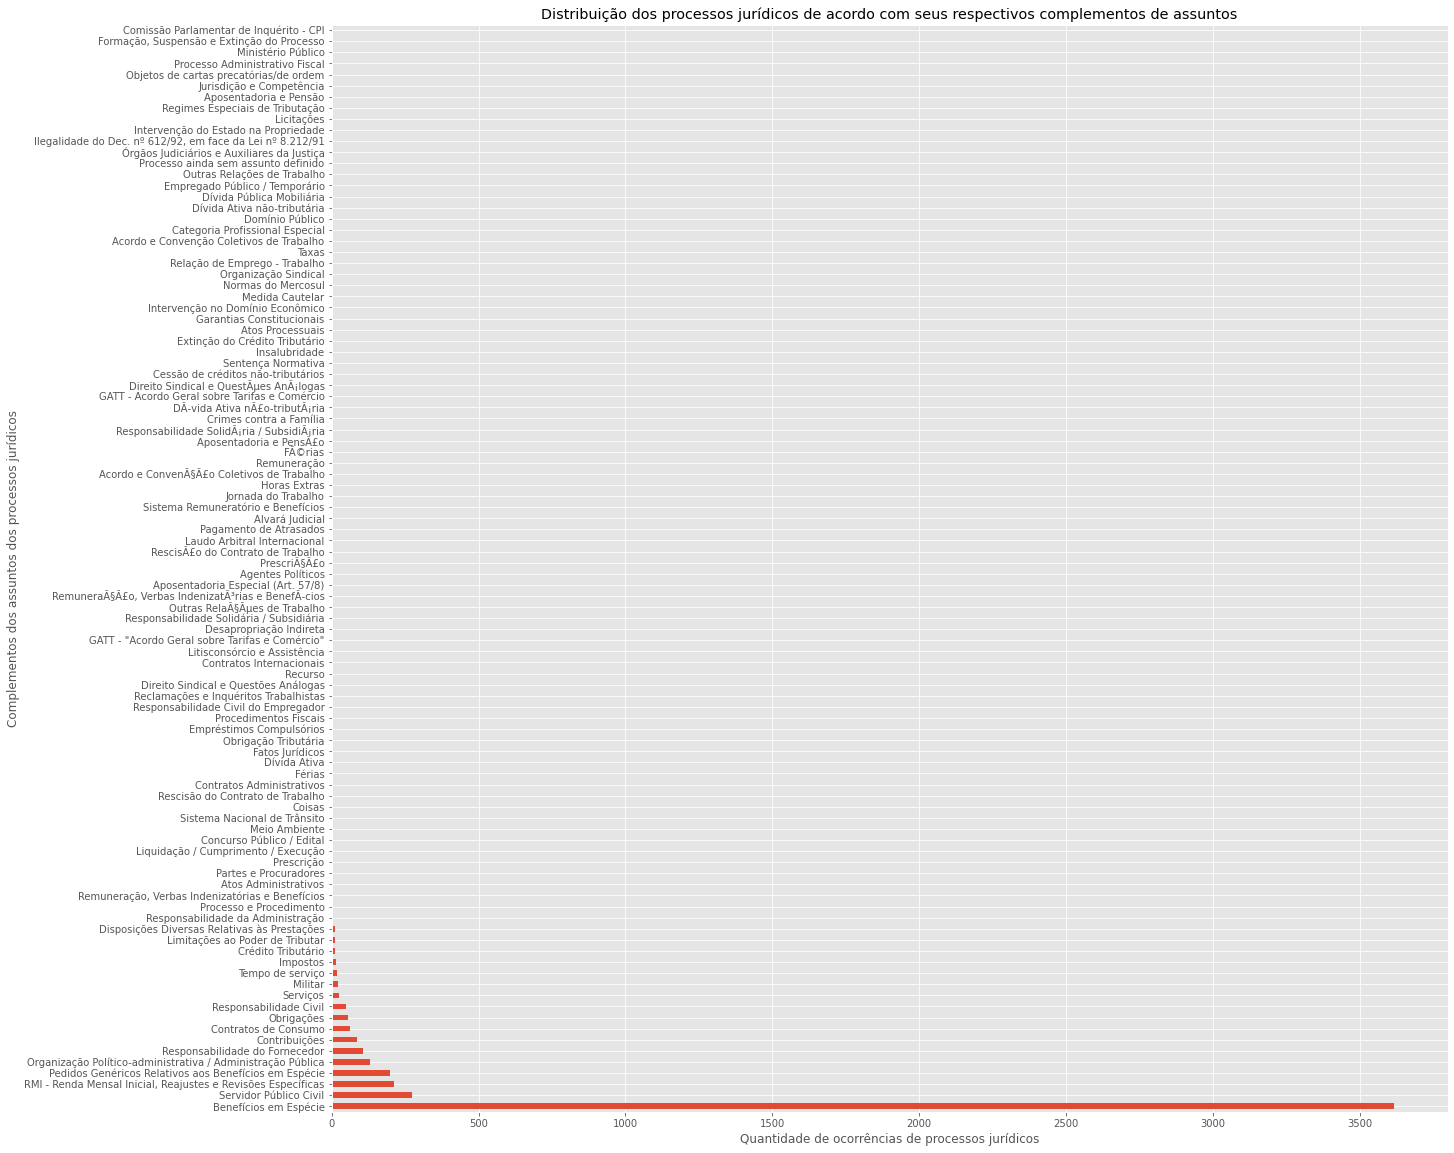

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 20))
complemento_assunto_cnj.plot(kind='barh')
plt.xlabel("Quantidade de ocorrências de processos jurídicos")
plt.ylabel("Complementos dos assuntos dos processos jurídicos")
plt.title("Distribuição dos processos jurídicos de acordo com seus respectivos complementos de assuntos")
plt.show()

In [ ]:
print(len(detalhe_assunto_cnj))

399


Podemos perceber que temos muitos detalhes de assuntos tratados nos processos jurídicos em questçao no nosso dataset, logo não faz muito sentido a visualização grafica desse aspecto.

In [ ]:
detalhe_assunto_cnj.head(30)

Auxílio-Doença Previdenciário                          1330
Benefício Assistencial (Art. 203,V CF/88)               821
Aposentadoria por Idade (Art. 48/51)                    464
Aposentadoria por Invalidez                             324
Salário-Maternidade (Art. 71/73)                        247
Sistema Remuneratório e Benefícios                      233
Pensão por Morte (Art. 74/9)                            209
Reajustes e Revisões Específicos                        117
FGTS/Fundo de Garantia por Tempo de Serviço             107
Indenização por Dano Moral                              103
RMI - Renda Mensal Inicial                               94
Parcelas de benefício não pagas                          77
Aposentadoria por Tempo de Contribuição (Art. 55/6)      75
Contribuições Previdenciárias                            73
Restabelecimento                                         69
Aposentadoria Especial (Art. 57/8)                       66
Indenização por Dano Material           

Podemos destacar os 10 detalhes de assunto mais recorrente no banco de dados, e são eles: 

* Auxílio-Doença Previdenciário                          
* Benefício Assistencial (Art. 203,V CF/88)               
* Aposentadoria por Idade (Art. 48/51)                    
* Aposentadoria por Invalidez                             
* Salário-Maternidade (Art. 71/73)                        
* Sistema Remuneratório e Benefícios                      
* Pensão por Morte (Art. 74/9)                            
* Reajustes e Revisões Específicos                        
* FGTS/Fundo de Garantia por Tempo de Serviço             
* Indenização por Dano Moral              

## visualizando dados para modelo ML

In [5]:
df_sentenca = dataset.loc[:,['resultado_1_grau','conteudo_sentenca','resultado_2_grau','conteudo_acordao']]

In [ ]:
df_sentenca.head()

,resultado_1_grau,conteudo_sentenca,resultado_2_grau,conteudo_acordao
0,PROCEDENTE,SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA...,NÃO PROVIMENTO,PROCESSO 0500454-62.2017.4.05.8402 EMENTA:DIREITO TRIBUTÁRIO. SERVIDOR PÚBLICO. RECURSO INOMINA...
1,EXTINTO SEM MÉRITO,"SENTENÇA Trata-se de ação especial cível, em cuja petição verifico, de plano, a existência de ví...",NaN,None
2,EXTINTO SEM MÉRITO,SENTENÇA Vistos etc. Trata-se de ação especial visando a cobrança de diferenças na concessão de ...,NaN,None
3,PROCEDENTE,"SENTENÇA I - RELATÓRIO Cuida-se de ação em que a parte autora, Emanuela Carneiro Tabosa postula ...",NÃO PROVIMENTO,"VOTO Relatório dispensado, nos termos do art. 38 da Lei n.o 9.099/95. Competência dos Juizados E..."
4,IMPROCEDENTE,"SENTENÇA Tipo A I – RELATÓRIO Dispensado o relatório, na forma do artigo 38 da Lei 9.099/95, sub...",NÃO PROVIMENTO,EMENTA PREVIDENCIÁRIO. PENSÃO POR MORTE. PROVA EMPRESTADA. POSSIBILIDADE. REQUISITOS PARA A CONC...


In [6]:
df_sentenca.loc[:,['resultado_1_grau']].value_counts()

resultado_1_grau       
IMPROCEDENTE               1862
EXTINTO SEM MÉRITO         1415
PROCEDENTE                  949
PARCIALMENTE PROCEDENTE     445
HOMOLOGADA TRANSAÇÃO        329
dtype: int64

## 3: Pipeline

### 3.1: Importando bibliotecas

In [63]:
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

### 3.2: Pré-processamento

Para este projeto, foi desenvolvido um modelo para solucionar a problemática:

> **Dado o conteúdo da sentença, qual o resultado do 1° grau do processo jurídico?**

Para isso, vamos precisar limpar os dados, visto que o conteúdo da sentença é uma coluna de texto livre e longo, com várias informações do processo. 

Para otimizar a criação do nosso modelo, vamos limpar o texto com o objetivo de coletar apenas as palavras chaves do texto, filtrando pontuações e palavras do tipo "stopwords", que são palavras que não contribuem com informações relevantes para compreensão do texto.

Também vamos criar nosso "corpus" de frases e convertê-las em minúsculas para não diferenciar entre, por exemplo, "Lei" e "lei".

* **Limpando o texto**


In [13]:
nltk.download('stopwords')
corpus = []
for i in range(0, 5000):
  conteudo_sentenca = re.sub('[^a-zA-ZzáàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]', ' ', dataset['conteudo_sentenca'][i])
  conteudo_sentenca = conteudo_sentenca.lower()
  conteudo_sentenca = conteudo_sentenca.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('portuguese')
  conteudo_sentenca = [ps.stem(word) for word in conteudo_sentenca if not word in set(all_stopwords)]
  conteudo_sentenca = ' '.join(conteudo_sentenca)
  corpus.append(conteudo_sentenca)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset['conteudo_sentenca'][0]

In [15]:
print(corpus[0])

sentença relatório cuida ação proposta face fazenda nacion município lagoa nova part autora objetiva devolução valor retido font título pss incident sobr parcela terço constitucion féria sucinto relatório dispensado termo parágrafo único art lei aplicável subsidiariament juizado especiai federai consonância art lei fundamentação benefício gratuidad judiciária tendo vista autora possui rendimento inferior teto rgp conform ficha financeira acostada auto critério reputo razoável fin concessão beness legal defiro pleito justiça gratuita ausência documento indispensávei propositura ação quanto alegação ausência documento indispensávei propositura ação consistent necessidad comprovação valor tributo retido igualment merec acolhida efeito relação demanda dessa natureza demai conhecida posição administração pública contrária tese sustentada apelada modo patent resistência pretensão deduzida juízo portanto inequívoco interess agir razão julgado invocado réna contestação ajusta caso sub examin p

In [16]:
resultado_1_grau = dataset.loc[:,'resultado_1_grau']
clean_data = pd.DataFrame((zip(corpus, resultado_1_grau)), columns = ['conteudo_sentenca', 'resultado_1_grau'])

le = LabelEncoder()

clean_data['resultado_1_grau'] = le.fit_transform(clean_data['resultado_1_grau'])

encoded_sample = le.inverse_transform([0, 1, 2, 3, 4])
print(f"Classes codificadas [0 1 2 3 4 ]: {encoded_sample}")

Classes codificadas [0 1 2 3 4 ]: ['EXTINTO SEM MÉRITO' 'HOMOLOGADA TRANSAÇÃO' 'IMPROCEDENTE'
 'PARCIALMENTE PROCEDENTE' 'PROCEDENTE']


In [55]:
oversampler = RandomOverSampler()
X, y = oversampler.fit_resample(clean_data['conteudo_sentenca'].values.reshape(-1, 1), clean_data['resultado_1_grau'].values.reshape(-1, 1))

#input_api = X[:2]

print("Distribuição das classes antes do oversampling:")
print(clean_data['resultado_1_grau'].value_counts())

print("Distribuição das classes após do oversampling:")
print(pd.DataFrame(y).value_counts())

Distribuição das classes antes do oversampling:
2    1862
0    1415
4     949
3     445
1     329
Name: resultado_1_grau, dtype: int64
Distribuição das classes após do oversampling:
0    1862
1    1862
2    1862
3    1862
4    1862
dtype: int64


* **Criando o modelo the Bag of Words**





Bag-Of-Words (BoW) tem como objetivo extrair características do texto, que podem ser utilizadas posteriormente na modelagem.

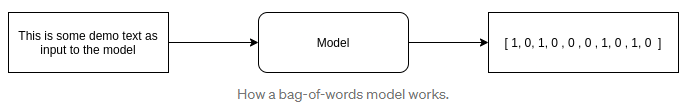

O processo pelo qual os dados de entrada são convertidos em um vetor de valores numéricos de característica é conhecido como Feature Extraction. Bag-Of-Words é também uma técnica de Feature Extraction para dados textuais.

Scikit-learn fornece uma biblioteca chamada `CountVectorizer()`,  que nos auxiliará na tokenização dos nossos dados categoricos.

In [56]:
cv = CountVectorizer()
X = cv.fit_transform(X.reshape(-1)).toarray()

### 3.3: Separando o dataset em Training set/Test set

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("x train: {}".format(x_train.shape))
print("y train: {}".format(y_train.shape))

x train: (7448, 35805)
y train: (7448,)


### Treinamento do modelo de Naive Bayes

In [58]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

* **Predicting the Test set results**

In [59]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 2 ... 3 1 1]


## 4: Avaliando o modelo

* **Predicting**

Escolhendo uma amostra do conjunto de `conteudo_sentenca` como entrada para testar a predição do nosso modelo.

Nesse caso, escolhemos a primeira linha do nosso dataset.

In [20]:
print(dataset['conteudo_sentenca'][0])

SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA, na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias. É o sucinto relatório, que seria até dispensado, nos termos do parágrafo único do art. 38 da Lei no 9.099/1995, aplicável subsidiariamente aos Juizados Especiais Federais, em consonância com o art. 1o da Lei no 10.259/2001. 2. Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS, conforme fichas financeiras acostadas aos autos, critério este que se reputo razoável para fins de concessão da benesse legal, defiro o pleito de justiça gratuita. Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação, consistente na necessidade de comprovação dos valores de tributos retidos, igualmente não

In [21]:
print(dataset['resultado_1_grau'][0])

PROCEDENTE


In [60]:
new_review = 'SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA, na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias. É o sucinto relatório, que seria até dispensado, nos termos do parágrafo único do art. 38 da Lei no 9.099/1995, aplicável subsidiariamente aos Juizados Especiais Federais, em consonância com o art. 1o da Lei no 10.259/2001. 2. Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS, conforme fichas financeiras acostadas aos autos, critério este que se reputo razoável para fins de concessão da benesse legal, defiro o pleito de justiça gratuita. Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação, consistente na necessidade de comprovação dos valores de tributos retidos, igualmente não merece acolhida. Com efeito, em relação a demandas dessa natureza, é por demais conhecida a posição do administração pública, contrária à tese sustentada pela apelada, de modo que é patente a resistência à pretensão deduzida em Juízo e, portanto, inequívoco o interesse de agir, razão pela qual o julgado invocado pela réna contestação não se ajusta ao caso sub examine. Da preliminar de mérito - prescrição Com relação à prescrição, o direito de pleitear a restituição extingue-se com o decurso do prazo de 5 (cinco) anos contados a partir dos marcos estipulados no art. 168 do Código Tributário Nacional: “Art. 168 - O direito de pleitear a restituição extingue-se com o decurso do prazo de 5 (cinco) anos, contados: I - nas hipóteses dos incisos I e II do artigo 165, da data da extinção do crédito tributário; II - na hipótese do inciso III do artigo 165, da data em que se tornar definitiva a decisão administrativa ou passar em julgado a decisão judicial que tenha reformado, anulado, revogado ou rescindido a decisão condenatória.” Nesse pórtico, deve-se analisar a incidência da prescrição quinquenal, que pode ser reconhecida de ofício pelo juiz, conforme o art. 219, §5o do Código de Processo Civil, com redação dada pela lei 11.280/2006. Tratando-se de servidor público regido por regime jurídico próprio, onde o lançamento é feito pela própria União, tem-se um lançamento de ofício, não havendo o que falar em prazo de homologação para que se torne definitivo. Desde o momento em que houve o desconto, ocorreu a extinção do crédito tributário, nascendo o direito do contribuinte de pleitear a restituição. Dessa forma, estão prescritos eventuais créditos recolhidos há mais de cinco anos da propositura da presente ação. Corroborando tais assertivas, tem-se o seguinte acórdão: PROCESSUAL CIVIL. TRIBUTÁRIO. AGRAVO REGIMENTAL. EMBARGOS DE DECLARAÇÃO. RECURSO ESPECIAL. REPETIÇÃO DE INDÉBITO. CONTRIBUIÇÃO DE SERVIDOR INATIVO. EMBARGOS ACOLHIDOS. INTEGRAÇÃO NOS LIMITES DA IMPUGNAÇÃO. TRIBUTO SUJEITO A LANÇAMENTO DE OFÍCIO. PRESCRIÇÃO. PRAZO QUINQUENAL. ART. 168, I, DO CTN. PRECEDENTES DA PRIMEIRA TURMA DESTE TRIBUNAL. 1. Ação objetivando afastar desconto incidente sobre contribuição previdenciária destinada ao Instituto de Previdência do Estado de São Paulo - Ipesp recolhida sobre os proventos de servidores aposentados. 2. Nos embargos declaratórios opostos pelos autores (fls. 409/412), que complementaram a decisão que analisou o recurso especial, não se apreciou questão fora dos limites do apelo nobre, pois se limitou a integração ao exame do prazo prescricional a ser observado na restituição da contribuição em debate, tema este solucionado pelo Tribunal de Justiça do Estado de São Paulo. 3. Quando do julgamento do AgRg no REsp 1.096.074/SP, da relatoria do eminente Ministro Francisco Falcão, DJ de 26/2/2009, a Primeira Turma do STJ decidiu, em síntese, que: a) a hipótese de descontos de contribuição de seguridade incidente sobre a remuneração de servidor configura-se lançamento de ofício e não por homologação; b) nesse panorama, o prazo prescricional a ser observado, no caso, é o quinquenal, conforme disciplina o art. 168, I, do CTN. 4. De igual modo: REsp 949.788/SC, Relator Ministro Franciso Falcão, DJ de 20.10.2008. 5. Agravo regimental não provido. (STJ. ADRESP 200702231531. Relator Ministro Benedito Gonçalves. Primeira Turma. DJU em 18/02/2010). (sem grifos no original). Do mérito propriamente dito A controvérsia do caso está em saber se é devida a incidência de contribuição previdenciária sobre o adicional de 1/3 de férias constitucional e se a parte autora faz jus à devolução do valor pago a esse título. Como se sabe, o modelo constitucional previdenciário dos servidores públicos federais está delineado em bases contributivas e atuariais, na conformidade da EC 20/98. Considerando que os valores pagos a título de adicional de um terço de férias não serão recebidos pelo servidor quando de sua aposentadoria, não podem integrar a base de cálculo da contribuição previdenciária. Assim, reconheço a não-incidência da contribuição previdenciária sobre o adicional de 1/3 de férias e adoto, integralmente, como razões de decidir, o contido no excerto do STJ, que está alinhado à jurisprudência do STF, abaixo transcrito: PROCESSUAL CIVIL. TRIBUTÁRIO. AGRAVO INTERNO NO RECURSO ESPECIAL. CÓDIGODEPROCESSOCIVILDE2015.APLICABILIDADE.ARGUMENTOS INSUFICIENTESPARADESCONSTITUIRADECISÃO ATACADA. CONTRIBUIÇÃO PREVIDENCIÁRIAA CARGO DA EMPRESA. DISCUSSÃO SOBRE A INCIDÊNCIAS OU NÃOSOBREASSEGUINTESVERBAS:TERÇOCONSTITUCIONAL DE FÉRIAS, SALÁRIOMATERNIDADE,SALÁRIO PATERNIDADE, AVISO PRÉVIO INDENIZADO; IMPORTÂNCIAPAGA,NOSQUINZE DIAS QUE ANTECEDEM O AUXÍLIO-DOENÇA, FÉRIASGOZADAS,DÉCIMO-TERCEIROSALÁRIO,ADICIONAISNOTURNO, DE PERICULOSIDADE, DE INSALUBRIDADE E DE TRANSFERÊNCIA, HORAS EXTRAS. MATÉRIA DECIDIDA EM RECURSO ESPECIAL SUBMETIDO À SISTEMÁTICA DO ART. 543-C DO CPC. RECURSO ESPECIAL PARCIALMENTE PROVIDO. I-ConsoanteodecididopeloPlenáriodestaCorte na sessão realizadaem09.03.2016,oregime recursal será determinado pela datadapublicaçãodoprovimentojurisdicional impugnado. Assim sendo, in casu, aplica-se o Código de Processo Civil de 2015. II-EstaCorte, ao julgar os Recursos Especiais n. 1.230.957/RS, 1.066.682/SPe1.358.281/SP,submetidosaoritodo art. 543-C, firmouentendimentosegundooqual:i)não incide contribuição previdenciáriasobre o terço constitucional de férias (gozadas e/ou indenizadas),avisoprévio indenizado, bem como sobre o valor pago peloempregador,nos15 (quinze) primeiros dias de afastamento do empregado,pordoençaouacidente, incidindo, por outro lado, em relaçãoaosaláriomaternidade e salário paternidade; ; ii) com a ediçãodaLein.8.620/1993,atributaçãoemseparadoda gratificaçãonatalinapassouater determinação legal expressa a partirdacompetênciade1993,sendocalculada em separado dos valoresda remuneração do mês de dezembro; iii) as verbas relativas aadicionaisnoturno,depericulosidade,deinsalubridade e de transferência,bemcomoosvaloresrecebidosa título de horas extras,possuemnaturezaremuneratória,sendopassíveisde contribuiçãoprevidenciáriaIII-Épacífica a orientação da 1a SeçãodoSuperiorTribunaldeJustiçasegundoaqualincide contribuição previdenciária patronal no pagamento de férias gozadas. III-AAgravantenãoapresenta,noregimental,argumentos suficientes para desconstituir a decisão agravada. IV - Agravo Interno improvido. (AgInt no REsp 1524039/SC, Rel. Ministra REGINA HELENA COSTA, PRIMEIRA TURMA, julgado em 17/05/2016, DJe 27/05/2016) TRIBUTÁRIO E PREVIDENCIÁRIO - EMBARGOS DE DIVERGÊNCIA - CONTRIBUIÇÃO PREVIDENCIÁRIA - TERÇO CONSTITUCIONAL DE FÉRIAS - NATUREZA JURÍDICA - NÃO-INCIDÊNCIA DA CONTRIBUIÇÃO - ADEQUAÇÃO DA JURISPRUDÊNCIA DO STJ AO ENTENDIMENTO FIRMADO NO PRETÓRIO EXCELSO. 1. A Primeira Seção do STJ considera legítima a incidência da contribuição previdenciária sobre o terço constitucional de férias. Precedentes. 2. Entendimento diverso foi firmado pelo STF, a partir da compreensão da natureza jurídica do terço constitucional de férias, considerado como verba compensatória e não incorporável à remuneração do servidor para fins de aposentadoria. 3. Realinhamento da jurisprudência do STJ, adequando-se à posição sedimentada no Pretório Excelso. 4. Embargos de divergência providos. (STJ. ERESP 956289. Relatora Ministra Eliana Calmon. Primeira Seção. DJ 10/11/2009) (sem grifos no original) Dessa forma, vislumbra-se que a pretensão autoral se mostra digna de acolhimento. 3. Dispositivo Diante do exposto, JULGO PROCEDENTE O PEDIDO para declarar a não incidência de contribuição previdenciária sobre o adicional de 1/3 de férias constitucional e condenar a ré à restituição dos valores pagos a esse título, acrescidos de correção monetáriae os juros moratórios com base nos índices da caderneta de poupança, conforme estabelece o art. 1-f da Lei 9.494/97, com a redação conferida pela Lei no 11.960/09, devendo-se, ainda, observar a Lei no 12.703/12, conforme entendimento da Turma Recursal, respeitada a prescrição quinquenal. Outrossim,determino ao MUNICÍPIO DE LAGOA NOVA que se abstenha de descontar a contribuição previdenciária sobre 1/3 de férias constitucional da parte autora. Defiro o benefício da justiça gratuita. Dispensado o pagamento de custas e honorários advocatícios (art. 55, Lei 9.099/95). Intimações na forma da Lei no 10.259/01. Caicó/RN, 21 de maio de 2017.  ARNALDO PEREIRA DE ANDRADE SEGUNDO Juiz Federal em substituição na 9a Vara/SJRN  '
new_review = re.sub('[^a-zA-ZzáàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('portuguese')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_x_test)
print(le.inverse_transform(new_y_pred))

['PROCEDENTE']


* **Making the Confusion Matrix**

In [64]:
cm = confusion_matrix(y_test, y_pred)
print('Acurácia do modelo: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Acurácia do modelo: 0.86


[]

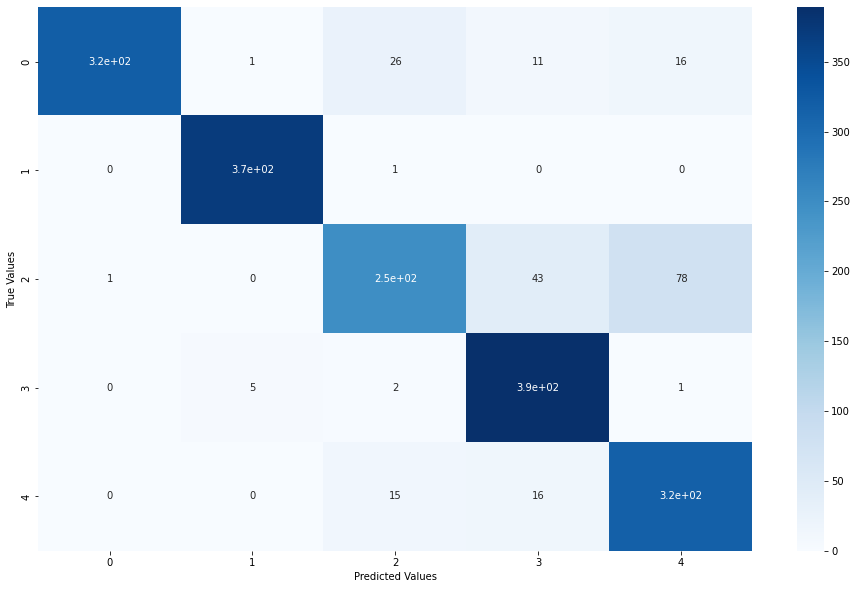

In [52]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(16,10))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.plot()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       386
           1       0.99      1.00      0.99       361
           2       0.81      0.62      0.70       381
           3       0.81      0.96      0.88       361
           4       0.73      0.87      0.79       373

    accuracy                           0.86      1862
   macro avg       0.87      0.86      0.86      1862
weighted avg       0.87      0.86      0.86      1862



## Salvando o Modelo

Nesta seção, iremos salvar nosso modelo para que seja reutilizado posteriormente.

Para isso, utilizaremos a ferramenta `Pickle` o qual permite a serialização de objetos, ou seja, os transforma em sequências de bytes.

In [ ]:
pickle.dump(classifier, open('pickle/model.pkl', 'wb'))

## API REST